In [212]:
import sys
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
import heapq


In [213]:
def dijkstra(graph, src):
    num_vertices = len(graph)
    
    # Initialize distance array and set all distances to infinity, except the source
    dist = [sys.maxsize] * num_vertices
    dist[src] = 0
    
    # Visited array to keep track of visited nodes
    visited = [False] * num_vertices
    
    for _ in range(num_vertices):
        # Find the vertex with the minimum distance value that hasn't been visited
        u = min_distance(dist, visited)
        
        # Mark the picked vertex as visited
        visited[u] = True
        
        # Update the distance value of the adjacent vertices of the picked vertex
        for v in range(num_vertices):
            # Update dist[v] if it's not visited, there's an edge from u to v, 
            # and the total weight of the path from src to v through u is smaller than the current value of dist[v]
            if not visited[v] and graph[u][v] > 0 and dist[u] + graph[u][v] < dist[v]:
                dist[v] = dist[u] + graph[u][v]
    
    # Print the computed shortest distances
    # print_solution(dist)
    print()


def min_distance(dist, visited):
    # Initialize minimum value
    min_val = sys.maxsize
    min_index = -1
    
    for v in range(len(dist)):
        if dist[v] < min_val and not visited[v]:
            min_val = dist[v]
            min_index = v
    
    return min_index


def print_solution(dist):
    print("Vertex \t Distance from Source")
    for i in range(len(dist)):
        print(f"{i} \t {dist[i]}")


# Example graph represented as an adjacency matrix
graph = [
    [0, 10, 0, 30, 100],
    [10, 0, 50, 0, 0],
    [0, 50, 0, 20, 10],
    [30, 0, 20, 0, 60],
    [100, 0, 10, 60, 0]
]

# Run Dijkstra's algorithm from vertex 0
dijkstra(graph, 0)


In [214]:
def dijkstra_heap(graph, src):
    # Number of vertices
    num_vertices = len(graph)
    
    # Distance array to store the minimum distance to each vertex
    dist = [float('inf')] * num_vertices
    dist[src] = 0
    
    # Priority queue (min-heap)
    priority_queue = [(0, src)]  # (distance, vertex)
    
    # While the priority queue is not empty
    while priority_queue:
        # Get the vertex with the smallest distance
        current_dist, u = heapq.heappop(priority_queue)
        
        # If the distance is already larger than the best known distance, skip it
        if current_dist > dist[u]:
            continue
        
        # Loop over all neighbors of vertex u
        for neighbor, weight in graph[u]:
            distance = current_dist + weight
            
            # If a shorter path is found
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return dist

# Example graph represented as an adjacency list
graph_heap = {
    0: [(1, 10), (3, 30), (4, 100)],
    1: [(0, 10), (2, 50)],
    2: [(1, 50), (3, 20), (4, 10)],
    3: [(0, 30), (2, 20), (4, 60)],
    4: [(0, 100), (2, 10), (3, 60)],
}

# # Run Dijkstra's algorithm from vertex 0
# distances = dijkstra(graph, 0)

# # Print the shortest distances from source 0 to all other vertices
# print("Vertex \t Distance from Source")
# for vertex, distance in enumerate(distances):
#     print(f"{vertex} \t {distance}")


In [384]:
def generate_graph_both_representations(num_vertices, density, max_weight=100):
    # Initialize adjacency matrix and adjacency list
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    adj_list = {i: [] for i in range(num_vertices)}
    
    # Add edges randomly based on the given density
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < density:  # Add edge with probability equal to 'density'
                weight = random.randint(1, max_weight)  # Generate random weight
                # Update adjacency matrix
                adj_matrix[i][j] = weight
                adj_matrix[j][i] = weight  # Because it's undirected
                
                # Update adjacency list
                adj_list[i].append((j, weight))
                adj_list[j].append((i, weight))  # Because it's undirected
    
    return adj_matrix, adj_list

In [215]:
def generate_graph(num_vertices, density, max_weight=100):
    # Initialize a 2D array (adjacency matrix) with 0's
    graph = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Add edges to the graph randomly based on the given density
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):  # ensure the graph is undirected
            if random.random() < density:  # add an edge with probability equal to 'density'
                weight = random.randint(1, max_weight)  # generate a random weight
                graph[i][j] = weight
                graph[j][i] = weight  # because the graph is undirected

    return graph

def print_graph(graph):
    for row in graph:
        print(row)

In [219]:
def generate_graph_heap(num_vertices, density, max_weight=100):
    graph = {i: [] for i in range(num_vertices)}  # Initialize the adjacency list
    
    # Add edges based on the given density
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < density:  # add an edge with a probability equal to 'density'
                weight = random.randint(1, max_weight)  # generate a random weight for the edge
                graph[i].append((j, weight))  # add edge from i to j
                graph[j].append((i, weight))  # add edge from j to i (undirected graph)
    
    return graph

def print_graph_heap(graph):
    for vertex in graph:
        print(f"{vertex}: {graph[vertex]}")


In [148]:
def printGraph(graph, title):
    # Create a graph object
    G = nx.Graph()

    # Add edges with weights from the adjacency matrix
    for i in range(len(graph)):
        for j in range(i+1, len(graph[i])):  # Avoid duplicates by checking only one side of the matrix
            if graph[i][j] != 0:  # There's an edge if the weight is not 0
                G.add_edge(i, j, weight=graph[i][j])

    # Define the layout for the graph
    pos = nx.spring_layout(G)  # Positions nodes using a force-directed algorithm

    # Draw the nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=6, font_weight='bold')

    # Draw edge labels (weights)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Display the graph
    plt.title(title)
    plt.show()
    


[0, 0, 0, 0, 86, 0, 50, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 41, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 20]
[86, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 41, 0, 0, 0, 0, 0]
[50, 0, 6, 0, 0, 0, 0, 0]
[0, 0, 0, 20, 0, 0, 0, 0]

[0, 86, 77, 29, 92, 42, 16, 0]
[86, 0, 18, 34, 0, 83, 1, 0]
[77, 18, 0, 0, 52, 0, 80, 37]
[29, 34, 0, 0, 0, 10, 11, 76]
[92, 0, 52, 0, 0, 26, 0, 61]
[42, 83, 0, 10, 26, 0, 0, 0]
[16, 1, 80, 11, 0, 0, 0, 0]
[0, 0, 37, 76, 61, 0, 0, 0]

[0, 20, 37, 57, 90, 56, 86, 3]
[20, 0, 49, 70, 39, 74, 57, 85]
[37, 49, 0, 71, 83, 10, 42, 26]
[57, 70, 71, 0, 77, 76, 35, 43]
[90, 39, 83, 77, 0, 41, 1, 53]
[56, 74, 10, 76, 41, 0, 63, 100]
[86, 57, 42, 35, 1, 63, 0, 84]
[3, 85, 26, 43, 53, 100, 84, 0]



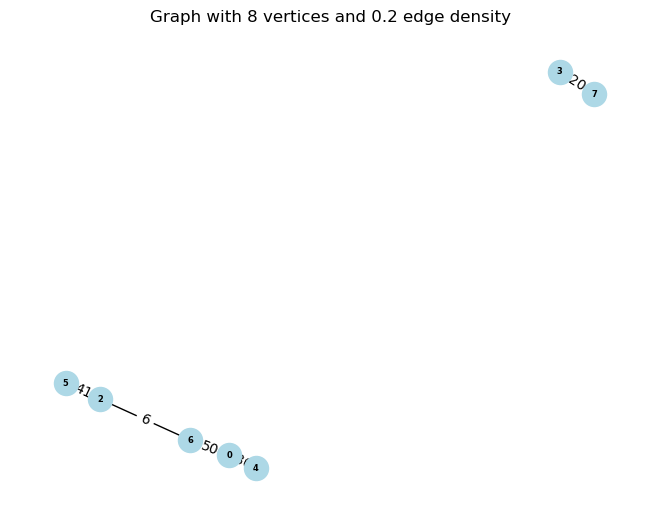

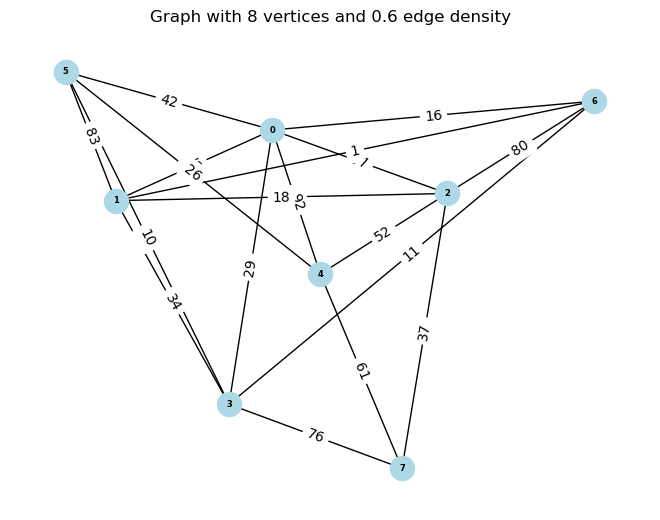

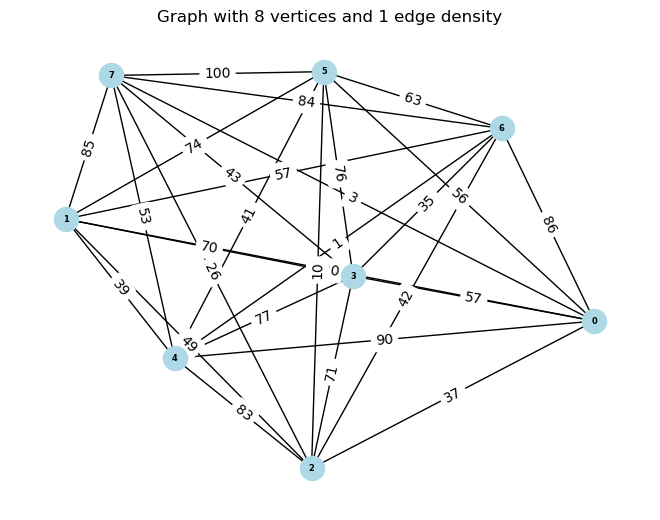

In [149]:
# Generate an undirected graph with 8 vertices, edge weights between 1 and 100, and 20% density
graph_8_20 = generate_graph(8, 0.2)
# Generate an undirected graph with 8 vertices, edge weights between 1 and 100, and 60% density
graph_8_60 = generate_graph(8, 0.6)
# Generate an undirected graph with 8 vertices, edge weights between 1 and 100, and 100% density
graph_8_100 = generate_graph(8, 1)

# Print the graph
print_graph(graph_8_20)
print()
print_graph(graph_8_60)
print()
print_graph(graph_8_100)
print()

printGraph(graph_8_20, "Graph with 8 vertices and 0.2 edge density")
printGraph(graph_8_60, "Graph with 8 vertices and 0.6 edge density")
printGraph(graph_8_100, "Graph with 8 vertices and 1 edge density")

In [208]:
TIME_EXPO = 1000000
TIME_UNIT = "microseconds"

# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 20% density
graph_100_20 = generate_graph(100, 0.2)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 60% density
graph_100_60 = generate_graph(100, 0.6)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 100% density
graph_100_100 = generate_graph(100, 1)

st=time.time()
dijkstra(graph_100_20, 0)
graph_100_20_et=(time.time() - st) * TIME_EXPO;
print(graph_100_20_et, TIME_UNIT)

st=time.time()
dijkstra(graph_100_60, 0)
graph_100_60_et=(time.time() - st) * TIME_EXPO;
print(graph_100_60_et, TIME_UNIT)

st=time.time()
dijkstra(graph_100_100, 0)
graph_100_100_et=(time.time() - st) * TIME_EXPO;
print(graph_100_100_et, TIME_UNIT)


1042.1276092529297 microseconds

999.9275207519531 microseconds

1000.1659393310547 microseconds


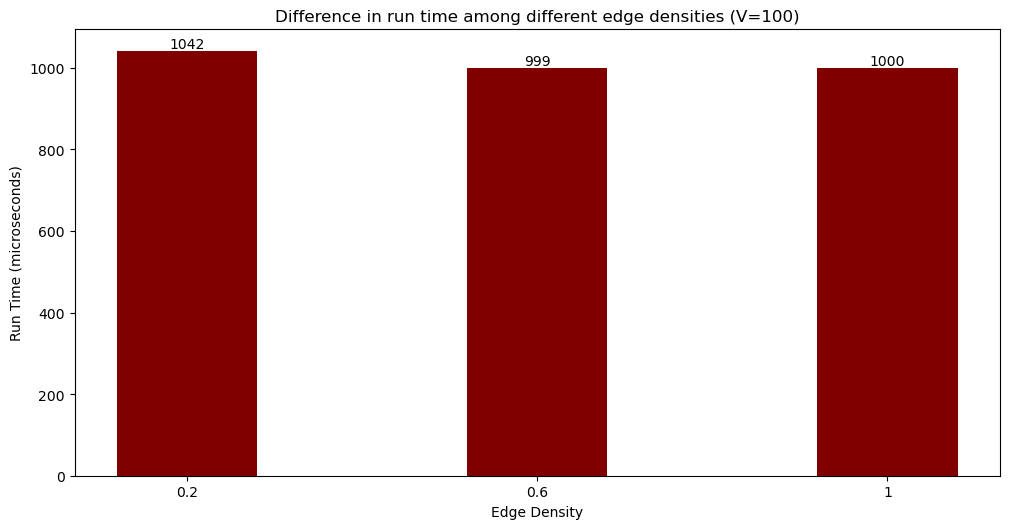

In [209]:
# creating the dataset
data = {'0.2':graph_100_20_et, '0.6':graph_100_60_et, '1':graph_100_100_et}
density = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
bar_100 = plt.bar(density, values, label='Comparisons', color ='maroon', width=0.4)

for bar in bar_100:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.title("Difference in run time among different edge densities (V=100)")
# Display both charts
plt.show()

In [210]:
# Generate an undirected graph with 200 vertices, edge weights between 1 and 100, and 20% density
graph_500_20 = generate_graph(500, 0.2)
# Generate an undirected graph with 200 vertices, edge weights between 1 and 100, and 20% density
graph_500_60 = generate_graph(500, 0.6)
# Generate an undirected graph with 200 vertices, edge weights between 1 and 100, and 20% density
graph_500_100 = generate_graph(500, 1)

st=time.time()
dijkstra(graph_200_20, 0)
graph_500_20_et=(time.time() - st) * TIME_EXPO;
print(graph_500_20_et, TIME_UNIT)

st=time.time()
dijkstra(graph_200_60, 0)
graph_500_60_et=(time.time() - st) * TIME_EXPO;
print(graph_500_60_et, TIME_UNIT)

st=time.time()
dijkstra(graph_200_100, 0)
graph_500_100_et=(time.time() - st) * TIME_EXPO;
print(graph_500_100_et, TIME_UNIT)


19454.479217529297 microseconds

18920.8984375 microseconds

19000.05340576172 microseconds


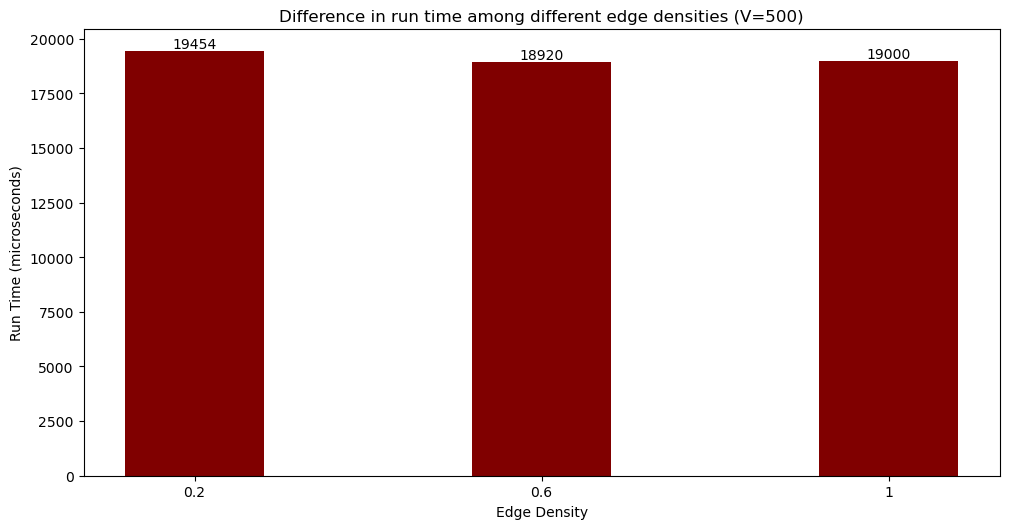

In [258]:
# creating the dataset
data = {'0.2':graph_500_20_et, '0.6':graph_500_60_et, '1':graph_500_100_et}
density = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
bar_500 = plt.bar(density, values, label='Comparisons', color ='maroon', width=0.4)

for bar in bar_500:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.title("Difference in run time among different edge densities (V=500)")
# Display both charts
plt.show()

In [251]:
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 20% density
graph_heap_100_20 = generate_graph_heap(100, 0.2)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 60% density
graph_heap_100_60 = generate_graph_heap(100, 0.6)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 100% density
graph_heap_100_100 = generate_graph_heap(100, 1)

st=time.time()
dijkstra_heap(graph_heap_100_20, 0)
graph_heap_100_20_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_100_20_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_heap_100_60, 0)
graph_heap_100_60_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_100_60_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_heap_100_100, 0)
graph_heap_100_100_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_100_100_et, TIME_UNIT)

989.1986846923828 microseconds
1001.3580322265625 microseconds
998.9738464355469 microseconds


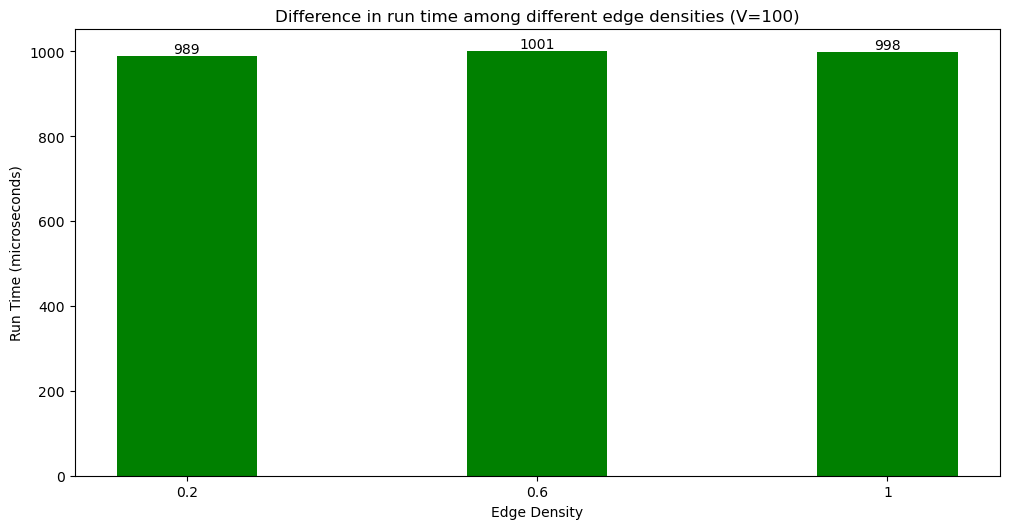

In [926]:
# creating the dataset
data = {'0.2':graph_heap_100_20_et, '0.6':graph_heap_100_60_et, '1':graph_heap_100_100_et}
density = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
bar_100 = plt.bar(density, values, label='Comparisons', color ='green', width=0.4)

for bar in bar_100:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.title("Difference in run time among different edge densities (V=100)")
# Display both charts
plt.show()

In [246]:
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 20% density
graph_heap_500_20 = generate_graph_heap(500, 0.2)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 60% density
graph_heap_500_60 = generate_graph_heap(500, 0.6)
# Generate an undirected graph with 20 vertices, edge weights between 1 and 100, and 100% density
graph_heap_500_100 = generate_graph_heap(500, 1)

st=time.time()
dijkstra_heap(graph_heap_500_20, 0)
graph_heap_500_20_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_500_20_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_heap_500_60, 0)
graph_heap_500_60_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_500_60_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_heap_500_100, 0)
graph_heap_500_100_et=(time.time() - st) * TIME_EXPO;
print(graph_heap_500_100_et, TIME_UNIT)

3991.1270141601562 microseconds
9999.990463256836 microseconds
14999.866485595703 microseconds


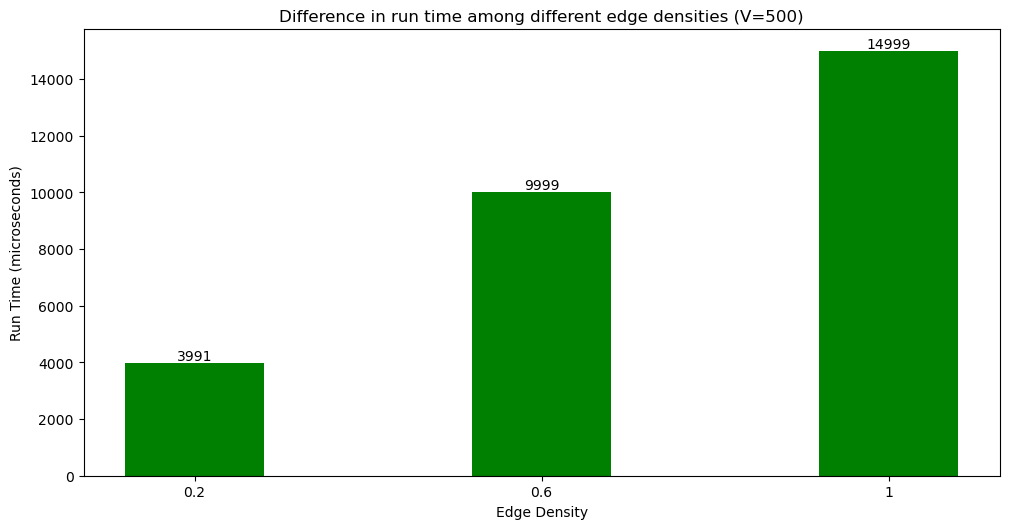

In [927]:
# creating the dataset
data = {'0.2':graph_heap_500_20_et, '0.6':graph_heap_500_60_et, '1':graph_heap_500_100_et}
density = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
bar_500 = plt.bar(density, values, label='Comparisons', color ='green', width=0.4)

for bar in bar_500:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.title("Difference in run time among different edge densities (V=500)")
# Display both charts
plt.show()

In [524]:
graph_100_20_matrix, graph_100_20_list = generate_graph_both_representations(100, 0.2)

print("V = 100, Edge Density = 0.2")
st=time.time()
dijkstra(graph_100_20_matrix, 0)
graph_100_20_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_100_20_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_100_20_list, 0)
graph_100_20_list_et=(time.time() - st) * TIME_EXPO;
print(graph_100_20_list_et, TIME_UNIT)

V = 100, Edge Density = 0.2

1139.6408081054688 microseconds
1305.1033020019531 microseconds


In [785]:
graph_100_40_matrix, graph_100_40_list = generate_graph_both_representations(100, 0.4)

print("V = 100, Edge Density = 0.4")
st=time.time()
dijkstra(graph_100_40_matrix, 0)
graph_100_40_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_100_40_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_100_40_list, 0)
graph_100_40_list_et=(time.time() - st) * TIME_EXPO;
print(graph_100_40_list_et, TIME_UNIT)

V = 100, Edge Density = 0.4

2030.1342010498047 microseconds
1503.2291412353516 microseconds


In [923]:
graph_100_60_matrix, graph_100_60_list = generate_graph_both_representations(100, 0.6)

print("V = 100, Edge Density = 0.6")
st=time.time()
dijkstra(graph_100_60_matrix, 0)
graph_100_60_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_100_60_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_100_60_list, 0)
graph_100_60_list_et=(time.time() - st) * TIME_EXPO;
print(graph_100_60_list_et, TIME_UNIT)

V = 100, Edge Density = 0.6

2106.189727783203 microseconds
1717.5674438476562 microseconds


In [840]:
graph_100_80_matrix, graph_100_80_list = generate_graph_both_representations(100, 0.8)

print("V = 100, Edge Density = 0.8")
st=time.time()
dijkstra(graph_100_80_matrix, 0)
graph_100_80_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_100_80_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_100_80_list, 0)
graph_100_80_list_et=(time.time() - st) * TIME_EXPO;
print(graph_100_80_list_et, TIME_UNIT)

V = 100, Edge Density = 0.8

1567.1253204345703 microseconds
2004.6234130859375 microseconds


In [662]:
graph_100_100_matrix, graph_100_100_list = generate_graph_both_representations(100, 1)

print("V = 100, Edge Density = 1")
st=time.time()
dijkstra(graph_100_100_matrix, 0)
graph_100_100_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_100_100_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_100_100_list, 0)
graph_100_100_list_et=(time.time() - st) * TIME_EXPO;
print(graph_100_100_list_et, TIME_UNIT)

V = 100, Edge Density = 1

1809.5970153808594 microseconds
1859.1880798339844 microseconds


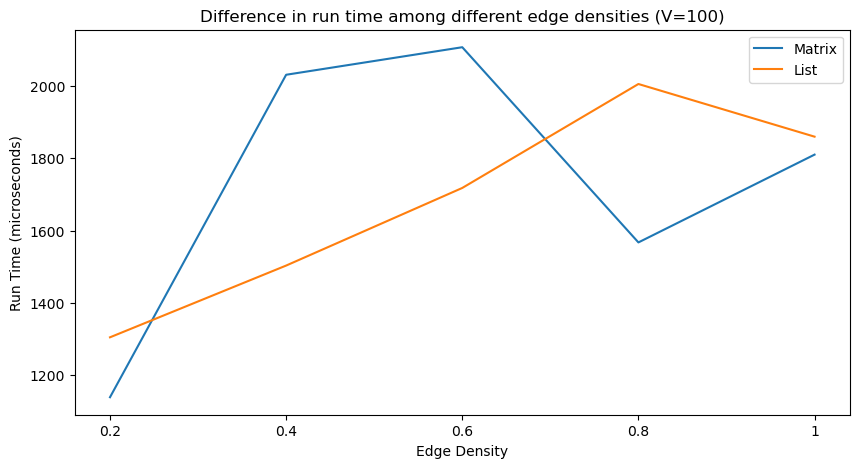

In [924]:
data_matrix = {'0.2':graph_100_20_matrix_et, '0.4':graph_100_40_matrix_et, '0.6':graph_100_60_matrix_et, '0.8':graph_100_80_matrix_et, '1':graph_100_100_matrix_et}
data_list = {'0.2':graph_100_20_list_et, '0.4':graph_100_40_list_et, '0.6':graph_100_60_list_et, '0.8':graph_100_80_list_et, '1':graph_100_100_list_et}

density = list(data_matrix.keys())
values_matrix = list(data_matrix.values())
values_list = list(data_list.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
plt.title("Difference in run time among different edge densities (V=100)")
plt.plot(density, values_matrix, label="Matrix")
plt.plot(density, values_list, label="List")
plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.legend()

In [512]:
graph_1000_20_matrix, graph_1000_20_list = generate_graph_both_representations(1000, 0.2)

print("V = 1000, Edge Density = 0.2")
st=time.time()
dijkstra(graph_1000_20_matrix, 0)
graph_1000_20_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_20_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_1000_20_list, 0)
graph_1000_20_list_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_20_list_et, TIME_UNIT)

V = 1000, Edge Density = 0.2

110504.6272277832 microseconds
15629.768371582031 microseconds


In [509]:
graph_1000_40_matrix, graph_1000_40_list = generate_graph_both_representations(1000, 0.4)

print("V = 1000, Edge Density = 0.4")
st=time.time()
dijkstra(graph_1000_40_matrix, 0)
graph_1000_40_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_40_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_1000_40_list, 0)
graph_1000_40_list_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_40_list_et, TIME_UNIT)

V = 1000, Edge Density = 0.4

126345.87287902832 microseconds
31976.938247680664 microseconds


In [494]:
graph_1000_60_matrix, graph_1000_60_list = generate_graph_both_representations(1000, 0.6)

print("V = 1000, Edge Density = 0.6")
st=time.time()
dijkstra(graph_1000_60_matrix, 0)
graph_1000_60_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_60_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_1000_60_list, 0)
graph_1000_60_list_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_60_list_et, TIME_UNIT)

V = 1000, Edge Density = 0.6

125683.06922912598 microseconds
62880.516052246094 microseconds


In [503]:
graph_1000_80_matrix, graph_1000_80_list = generate_graph_both_representations(1000, 0.8)

print("V = 1000, Edge Density = 0.8")
st=time.time()
dijkstra(graph_1000_80_matrix, 0)
graph_1000_80_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_80_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_1000_80_list, 0)
graph_1000_80_list_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_80_list_et, TIME_UNIT)

V = 1000, Edge Density = 0.8

126743.31665039062 microseconds
89023.35166931152 microseconds


In [501]:
graph_1000_100_matrix, graph_1000_100_list = generate_graph_both_representations(1000, 1)

print("V = 1000, Edge Density = 1")
st=time.time()
dijkstra(graph_1000_100_matrix, 0)
graph_1000_100_matrix_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_100_matrix_et, TIME_UNIT)

st=time.time()
dijkstra_heap(graph_1000_100_list, 0)
graph_1000_100_list_et=(time.time() - st) * TIME_EXPO;
print(graph_1000_100_list_et, TIME_UNIT)

V = 1000, Edge Density = 1

134018.6595916748 microseconds
111014.12773132324 microseconds


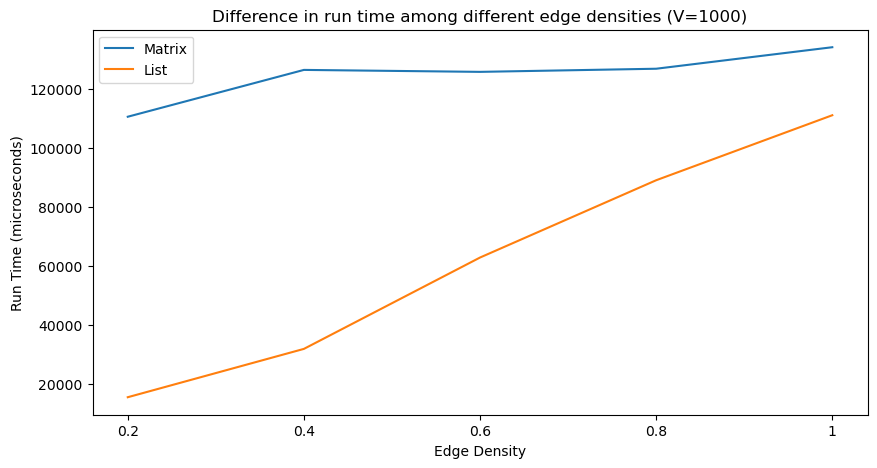

In [516]:
data_matrix = {'0.2':graph_1000_20_matrix_et, '0.4':graph_1000_40_matrix_et, '0.6':graph_1000_60_matrix_et, '0.8':graph_1000_80_matrix_et, '1':graph_1000_100_matrix_et}
data_list = {'0.2':graph_1000_20_list_et, '0.4':graph_1000_40_list_et, '0.6':graph_1000_60_list_et, '0.8':graph_1000_80_list_et, '1':graph_1000_100_list_et}

density = list(data_matrix.keys())
values_matrix = list(data_matrix.values())
values_list = list(data_list.values())

fig = plt.figure(figsize = (10, 5))

# creating the first bar plot for comparisons
plt.title("Difference in run time among different edge densities (V=1000)")
plt.plot(density, values_matrix, label="Matrix")
plt.plot(density, values_list, label="List")
plt.xlabel("Edge Density")
plt.ylabel("Run Time (microseconds)")
plt.legend()